In [3]:
%matplotlib inline

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [5]:
x = np.array([1,2,3,4,5,6]).repeat(10)

In [6]:
y = np.array([[0.5916666666666667, 0.5583333333333333, 0.6916666666666667, 0.675, 0.6666666666666666, 0.7, 0.625, 0.6324786324786325, 0.6581196581196581, 0.6379310344827587],
[0.5166666666666667, 0.5666666666666667, 0.6166666666666667, 0.7166666666666667, 0.6166666666666667, 0.5583333333333333, 0.6416666666666667, 0.6666666666666666, 0.6324786324786325, 0.6379310344827587],
[0.5916666666666667, 0.5583333333333333, 0.7,0.7, 0.675, 0.5916666666666667, 0.65, 0.6239316239316239, 0.6410256410256411, 0.6120689655172413],
[0.5833333333333334, 0.6083333333333333, 0.6916666666666667, 0.675, 0.6666666666666666, 0.6333333333333333, 0.625, 0.6581196581196581, 0.7264957264957265, 0.6551724137931034],
[0.5416666666666666, 0.575, 0.65, 0.6833333333333333, 0.6416666666666667, 0.6, 0.625, 0.6068376068376068, 0.6324786324786325, 0.6120689655172413],
[0.5916666666666667, 0.6583333333333333, 0.6666666666666666, 0.6833333333333333, 0.7250000000000001, 0.6333333333333333, 0.7083333333333334, 0.6752136752136753, 0.7094017094017093, 0.6551724137931034]]).flatten()

In [7]:
X = sm.add_constant(x)

In [8]:
model = sm.OLS(y*100, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 10 Feb 2020   Prob (F-statistic):              0.231
Time:                        12:16:01   Log-Likelihood:                -177.56
No. Observations:                  60   AIC:                             359.1
Df Residuals:                      58   BIC:                             363.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3940      1.397     44.658      0.0

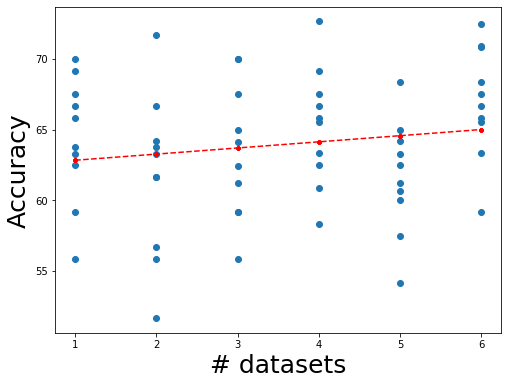

In [9]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y*100, 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
#ax.plot(x, iv_u, 'r--')
#ax.plot(x, iv_l, 'r--')
#ax.legend(loc='best', fontsize=20)
ax.set_xlabel("# datasets", fontsize=25)
ax.set_ylabel("Accuracy", fontsize=25)
plt.savefig("dataset.pdf", fotmat="pdf", bbox_inches="tight")

In [18]:
y_collab = [[0.7984031936127745, 0.7684630738522954, 0.7724550898203593, 0.7524950099800399, 0.7664670658682635, 0.7735470941883767, 0.8036072144288577, 0.7675350701402806, 0.7474949899799599, 0.7414829659318637],
[0.7125748502994012, 0.7145708582834331, 0.7405189620758483, 0.6926147704590818, 0.7624750499001997, 0.7354709418837675, 0.7414829659318637, 0.7034068136272545, 0.6953907815631263, 0.7134268537074149],
[0.8143712574850299, 0.7664670658682635, 0.7924151696606786, 0.7704590818363274, 0.7984031936127745, 0.7895791583166333, 0.8316633266533067, 0.7935871743486974, 0.779559118236473, 0.7575150300601202],
[0.8023952095808383, 0.7764471057884231, 0.7884231536926147, 0.7524950099800399, 0.8023952095808383, 0.781563126252505, 0.7975951903807615, 0.7995991983967936, 0.781563126252505, 0.7555110220440882],
[0.7764471057884231, 0.7884231536926147, 0.7904191616766467, 0.782435129740519, 0.7964071856287425, 0.7775551102204409, 0.8176352705410822, 0.7875751503006012, 0.7755511022044088, 0.7755511022044088],
[0.7924151696606786, 0.7604790419161677, 0.780439121756487, 0.782435129740519, 0.7964071856287425, 0.7855711422845691, 0.8036072144288577, 0.7855711422845691, 0.7995991983967936, 0.7875751503006012]]

In [19]:
y_collab = np.array(y_collab).flatten()

In [21]:
model2 = sm.OLS(y_collab*100, X)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     15.70
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           0.000206
Time:                        12:17:35   Log-Likelihood:                -143.56
No. Observations:                  60   AIC:                             291.1
Df Residuals:                      58   BIC:                             295.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.4737      0.793     93.938      0.0

In [22]:
prstd, iv_l, iv_u = wls_prediction_std(results2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y_collab*100, 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
#ax.plot(x, iv_u, 'r--')
#ax.plot(x, iv_l, 'r--')
#ax.legend(loc='best', fontsize=20)
ax.set_xlabel("# datasets", fontsize=25)
ax.set_ylabel("Accuracy", fontsize=25)
plt.savefig("dataset_collab.pdf", fotmat="pdf", bbox_inches="tight")

In [23]:
import seaborn as sns

In [24]:
tips = sns.load_dataset("tips")

In [25]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

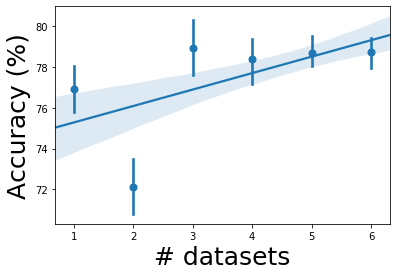

In [43]:
ax = sns.regplot(x=X[:, 1], y=y_collab*100, x_estimator=np.mean)
ax.set_xlabel("# datasets", fontsize=25)
ax.set_ylabel("Accuracy (%)", fontsize=25)
plt.savefig("dataset_collab_new.pdf", fotmat="pdf", bbox_inches="tight")

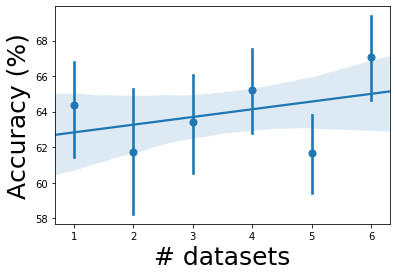

In [44]:
ax = sns.regplot(x=X[:, 1], y=y*100, x_estimator=np.mean)
ax.set_xlabel("# datasets", fontsize=25)
ax.set_ylabel("Accuracy (%)", fontsize=25)
plt.savefig("dataset_airport_new.pdf", fotmat="pdf", bbox_inches="tight")

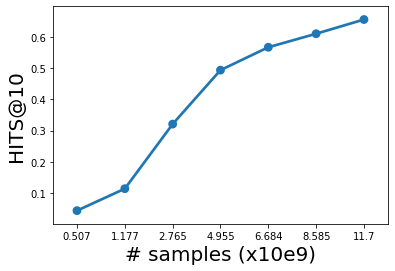

In [70]:
samples = np.array([0.507, 1.177, 2.765, 4.955, 6.684, 8.585, 11.7]) 

hits10 = np.array([0.0441235, 0.114284, 0.3207723, 0.493242, 0.566384, 0.60958, 0.655028])

# Initialize figure and ax
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
#ax.set(xscale="log")
sns.pointplot(samples, hits10, ax=ax)
plt.xlabel("# samples (x10e9)", fontsize=20)
plt.ylabel("HITS@10", fontsize=20)
plt.savefig("clueweb.pdf", format="pdf",  bbox_inches="tight")

In [69]:
samples = np.array([0.8421, 1.955, 4.592, 8.23, 11.1, 14.26]) 

hits10 = np.array([0.148044, 0.224744, 0.332315, 0.419292, 0.461233, 0.486192])

# Initialize figure and ax
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
#ax.set(xscale="log")
sns.pointplot(samples, hits10, ax=ax)
plt.xlabel("# samples (x10e9)", fontsize=20)
plt.ylabel("HITS@10", fontsize=20)
plt.savefig("hyperlink2014.pdf", format="pdf",  bbox_inches="tight")